In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
# run the following commands in the Terminal
# cd emg_data
# extract files, unrar x "./emg.rar" "./"
# install tree sudo apt install tree
# tree "./EMG Physical Action Data Set/sub1"
# ls -lrt ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/
# cat ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/Slapping.txt

In [4]:
# run the following commands in the command line (MacOS)
# cd emg_data
# extract files, tar -xf emg.rar
# install brew, brew install tree
# view the tree disgram of the file system in the EMG dataset directory, tree "./EMG Physical Action Data Set/sub1"
# view the files in one of the node directories, ls -lrt ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/
# view the data in slappint.txt, cat ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/Slapping.txt

# Data Chunking
Data chunking is a technique used to divide a large dataset into smaller, more manageable chunks. In the context of Electromyography (EMG) signals, chunking is employed to address the issue of data redundancy, where consequtive samples exhibit high similarity.

### Why chunk EMG data?
1. Redundancy reduction: By identifying and removing redundant data, chunking can significantly reduce the dataset's size.
2. Improved training efficiency: Smaller datasets require less computational resourves and time for training Machine Learning models.
3. Enhanced model performance: By focusing on unique information, models can learn more effectively and achieve better performance.

### Chunking process
1. Interval selection: The optimal chunk size depends on the specific dataset and application. In the given scenario, an interval size of 10 is chosen.
2. Data segmentation: The dataset is divided into consecutive intervals of length 10.
3. Feature extraction: For each interval, a representative feature is extracted, such as mean, median, or maximum value.

### Note on data loss
While chunking inevitably leads to some loss of information, the benefits often outweigh the drawbacks, especially when dealing with redundant data. The key is to choose an appropriate chunk size that balances data reduction with information preservation.

In [5]:
import os

actions = {}
data_dirs = [
    "./emg_data/EMG Physical Action Data Set/sub1/Aggressive/txt",
    "./emg_data/EMG Physical Action Data Set/sub1/Normal/txt"
]
ind = 0
df = pd.DataFrame()

for dirs in data_dirs:
    for files in os.listdir(dirs):
        with open(os.path.join(dirs, files), "r") as file:
            temp = pd.read_csv(
                file.name,
                sep = "\t",
                header = None,
                names = ["ch" + str(i) for i in range(1, 9)]
            )

            # chunking using max of every 10 sequential values
            temp_chunked = pd.DataFrame()

            for i in range(0, len(temp), 10):
                temp_chunked = pd.concat([temp_chunked, temp.iloc[i: i+10].max().to_frame().T], ignore_index=True)

            labels = [files[: -4] for i in range(len(temp_chunked))] # remove the last 4 characters = ".txt" from the filename
            actions[files[: -4]] = ind

            temp_chunked["Action"] = labels

            df = pd.concat([df, temp_chunked], ignore_index = True)

            ind += 1

actions

{'Hamering': 0,
 'Pulling': 1,
 'Frontkicking': 2,
 'Pushing': 3,
 'Elbowing': 4,
 'Slapping': 5,
 'Kneeing': 6,
 'Punching': 7,
 'Sidekicking': 8,
 'Headering': 9,
 'Standing': 10,
 'Waving': 11,
 'Bowing': 12,
 'Clapping': 13,
 'Jumping': 14,
 'Handshaking': 15,
 'Running': 16,
 'Seating': 17,
 'Walking': 18,
 'Hugging': 19}

In [6]:
df.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Action
0,634,1701,2018,1802,354,-4000,4000,-1198,Hamering
1,-455,1648,-4000,2193,-1650,4000,4000,-1803,Hamering
2,281,1051,1308,1300,1417,4000,-4000,739,Hamering
3,1433,-102,2746,655,1963,1669,1734,1372,Hamering
4,2325,48,2669,1718,2492,3735,1902,1460,Hamering


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19711 entries, 0 to 19710
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ch1     19711 non-null  int64 
 1   ch2     19711 non-null  int64 
 2   ch3     19711 non-null  int64 
 3   ch4     19711 non-null  int64 
 4   ch5     19711 non-null  int64 
 5   ch6     19711 non-null  int64 
 6   ch7     19711 non-null  int64 
 7   ch8     19711 non-null  int64 
 8   Action  19711 non-null  object
dtypes: int64(8), object(1)
memory usage: 1.4+ MB


In [8]:
x = df.drop(columns = ["Action"])
y = df["Action"]

In [9]:
y.unique()

array(['Hamering', 'Pulling', 'Frontkicking', 'Pushing', 'Elbowing',
       'Slapping', 'Kneeing', 'Punching', 'Sidekicking', 'Headering',
       'Standing', 'Waving', 'Bowing', 'Clapping', 'Jumping',
       'Handshaking', 'Running', 'Seating', 'Walking', 'Hugging'],
      dtype=object)

In [10]:
# label encoding the target variable
y = y.map(actions)
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [11]:
# checking if the dataset is balanced
y.value_counts(normalize = True)

Action
0     0.050733
14    0.050733
18    0.050733
6     0.050733
17    0.050733
9     0.050733
11    0.050733
13    0.050733
16    0.050581
8     0.049871
12    0.049871
2     0.049820
5     0.049668
4     0.049617
19    0.049515
10    0.049363
3     0.049110
1     0.049008
7     0.048907
15    0.048805
Name: proportion, dtype: float64

# Rectifying EMG Signals
Rectification of signal processing technique used to convert Alternating Current (AC) signals into Direct Current (DC) signals. In the context of EMG signals, it is used to eliminate negative values and ensure that all signal values are positive.

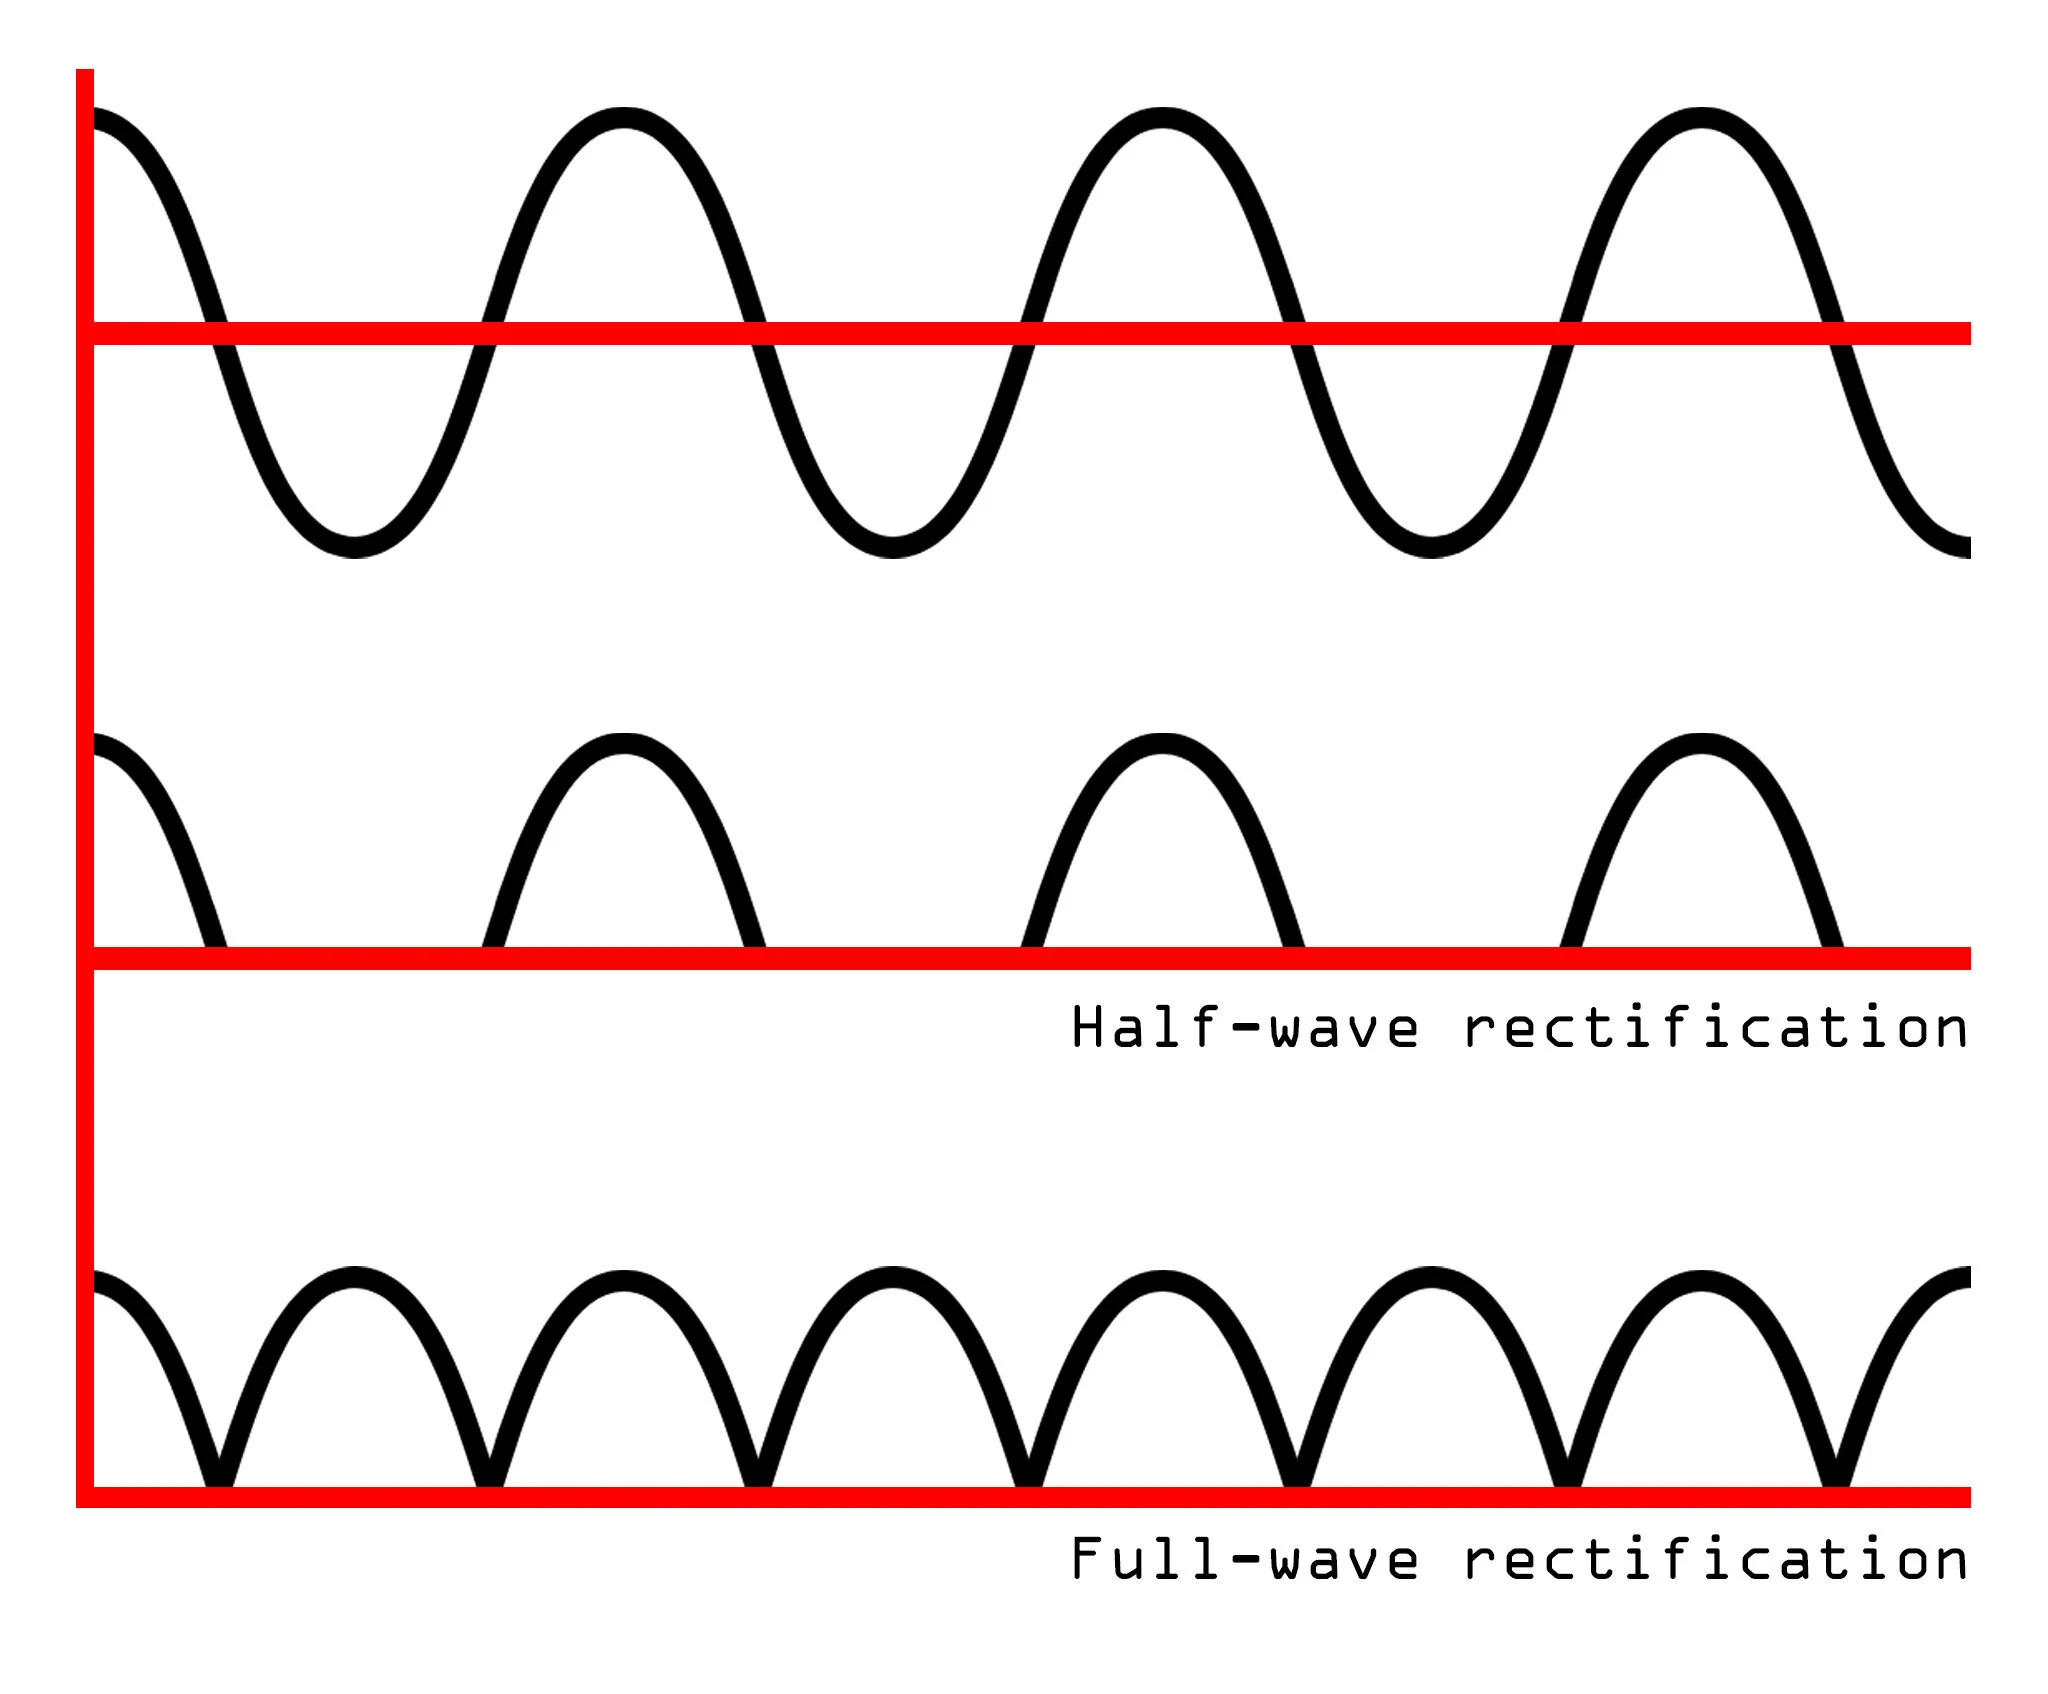

### Why rectify EMG signals?
- Data analysis: Many signals processing techniques, such as feature extraction and classification, assume positive-only signals. Rectification ensures that the signals is suitable for these techniques.
- Noise reduction: Rectification can help reduce the impact of noise, especially if the noise has a significant DC component.
- Visualization: Visualizing rectified signals can often provide a clearer understanding of the underlying muscle activity.

### Half-Wave rectification
- Process: Only the positive half-cycle of the signal are retained, while the negative half-cycles are discarded.
- Advantage: Simple to implement.
- Disadvantage: Significant loss of information, as half of the signal is discarded.

### Full-Wave rectification
- Process: The absolute value of each sample in the signal is taken, resulting in positive-only signal.
- Advantage: Retains all information from the original signal.
- Disadvantage: Can introduce additional noise, especially if the original signal has a significant DC component.

### Why Full-Wave rectification is preferred for EMG signals?
For EMG signals, Full-Wave rectification is generally preferred over Half-Wave rectification due to the following reasons,
1. Preservation of information: Full-Wave rectification retains all the information present in the original signal, including both the amplitude and timing of muscle activity. This is crucial for accurate analysis and interpretation of EMG data.
2. Reduced noise: While Full-Wave rectification can introduce some additional noise, it can also help to reduce noise that is correlated with the original signal. This is because the noise is often symmetric around zero, and Full-Wave rectification can help to cancel out this noise.

In [12]:
x = abs(x)
x.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,634,1701,2018,1802,354,4000,4000,1198
1,455,1648,4000,2193,1650,4000,4000,1803
2,281,1051,1308,1300,1417,4000,4000,739
3,1433,102,2746,655,1963,1669,1734,1372
4,2325,48,2669,1718,2492,3735,1902,1460


# Noise In EMG Signals And Its Removal
### Why does noise occur in EMG signals?
Noise in EMG signals can arise from various sources. Including,
- Electrode impedance: Poor electrode-skin contact can introduce noise into the signal.
- Electromagnetic interference (EMI): External electromagnetic fields, such as those from power lines or electronic devices, can interfere with the signal.
- Movement artifacts: Movement of the electrodes or the subject can introduce noise.
- Biological noise: Physiological factors like muscle tremor and shivering can contribute to noise.

### Why is noise removal relevant?
Noise in EMG signal can significantly degrade the quality of the signal and negatively impact the performance of subsequent analysis and Machine Learning models. Removing noise can,
- Improve signal quality: Reduce the impact of unwanted variations.
- Enhance feature extraction: Facilitate the extraction of meaningful features from the signal.
- Improve model performance: Enhance the accuracy and robustness of Machine Learning models.

### Noise reduction techniques
Several techniques can be employed to reduce noise in EMG signals,
1. Filtering:
    - Low-pass filter: Removes high-frequency noise.
    - High-pass filter: Removes low-frequency noise, such as baseline drift.
    - Band-pass filter: Retains a specific frequency band of interest.
    - Notch filter: Removes noise at a specific frequency, such as power line interference (50/ 60 Hz).
2. Moving average filter:
    - Replaces each data point with the average of a fixed number of neighboring points.
    - Reduces high-frequency noise and smooths the signal.
3. Exponential moving average (EMA):
    - Assigns exponentially decreasing weights to past observations.
    - More responsive to recent changes than a simple moving average.

### Choosing a noise reduction technique
The choice of noise reduction technique depends on the specific characteristics of the noise and the desired level of smoothing. In many cases, a combination of filtering and smoothing techniques can provide optimal results.

In [13]:
x = x.ewm(com = 10).mean()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19711 entries, 0 to 19710
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch1     19711 non-null  float64
 1   ch2     19711 non-null  float64
 2   ch3     19711 non-null  float64
 3   ch4     19711 non-null  float64
 4   ch5     19711 non-null  float64
 5   ch6     19711 non-null  float64
 6   ch7     19711 non-null  float64
 7   ch8     19711 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15768, 8), (3943, 8), (15768,), (3943,))

In [15]:
import pickle

with open("emg_data/x_train.pkl", "wb") as file:
    pickle.dump(x_train, file)

with open("emg_data/x_test.pkl", "wb") as file:
    pickle.dump(x_test, file)

with open("emg_data/y_train.pkl", "wb") as file:
    pickle.dump(y_train, file)

with open("emg_data/y_test.pkl", "wb") as file:
    pickle.dump(y_test, file)